In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch.utils import data
from mpl_toolkits.mplot3d import Axes3D
from train import Dataset, train_epoch, eval_epoch, test_epoch
from model3D import LES

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import warnings
warnings.filterwarnings("ignore")

In [2]:
def show_3d(varone):
    plt.close('all')
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = np.linspace(-6, 6, 128)
    Y = np.linspace(-6, 6, 128)
    X, Y = np.meshgrid(X, Y)

    cset = [[],[],[]]

    # this is the example that worked for you:
    Z = varone[:,0,:]
    cset[0] = ax.contourf(X, Y, Z, zdir='z', offset=-6,
                            levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

    # now, for the x-constant face, assign the contour to the x-plot-variable:
    Z = varone[:,:,0]
    cset[1] = ax.contourf(Z, Y, X, zdir='x', offset=-6,
                            levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

    # likewise, for the y-constant face, assign the contour to the y-plot-variable:
    Z = varone[0,:,:]
    cset[2] = ax.contourf(X, Z, Y, zdir='y', offset=6,
                            levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

    # setting 3D-axis-limits:    
    ax.set_xlim3d(-6,6)
    ax.set_ylim3d(-6,6)
    ax.set_zlim3d(-6,6)

    plt.show()

In [3]:
valid_direc = "/global/cscratch1/sd/roseyu/Xingyu/3D_128/sample_"

min_mse = 1
time_range  = 5
output_length = 3
input_length = 10
learning_rate = 0.0002
dropout_rate = 0
kernel_size = 3
batch_size = 1

valid_indices = list(range(40, 48))
valid_set = Dataset(valid_indices, input_length + time_range - 1, 40, 3, valid_direc, True)
valid_loader = data.DataLoader(valid_set, batch_size = batch_size, shuffle = False, num_workers = 1)

In [4]:
model = LES(input_channels = input_length*3, output_channels = 3, kernel_size = kernel_size, 
            dropout_rate = dropout_rate, time_range = time_range).to(device)
model.load_state_dict(torch.load("model.pth").module.state_dict())

<All keys matched successfully>

In [5]:
# for xx, yy in valid_loader:
#     xx = xx.to(device)
#     break
# print(yy.transpose(0,1).shape)

imgs = []
xx = torch.load("temp/sequence.pt").to(device)
for _ in range(3):
    im = model(xx)
    xx = torch.cat([xx[:, 3:], im], 1)
    imgs.append(im.cpu())
    
torch.save(imgs, "temp/10-12.pt")
torch.save(xx.cpu(), "temp/sequence.pt")

print(im.shape)

torch.Size([1, 3, 128, 128, 128])


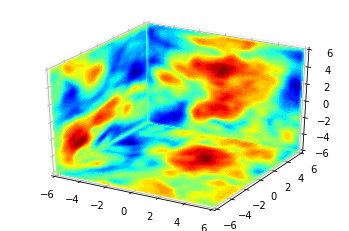

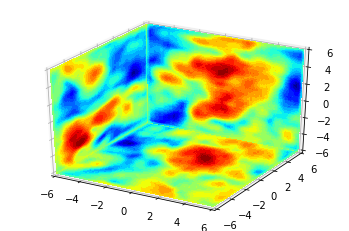

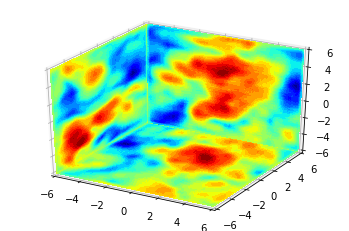

In [6]:
# varone = im.cpu().data.numpy()[0, 0]
varone = imgs[0].data.numpy()[0, 0]
show_3d(varone)

varone = imgs[1].data.numpy()[0, 0]
show_3d(varone)

varone = imgs[2].data.numpy()[0, 0]
show_3d(varone)

# varone = yy.cpu().data.numpy()[0, 0, 0]
# show_3d(varone)

In [9]:
preds = im[0].permute(1,2,3,0).cpu().data.numpy()
torch.save(preds, "Evaluate/sample/preds.pt")

truths = yy[0,0].permute(1,2,3,0).cpu().data.numpy()
torch.save(truths, "Evaluate/sample/truths.pt")

In [10]:
print(preds.shape)
print(truths.shape)

(128, 128, 128, 3)
(128, 128, 128, 3)
